<a href="https://colab.research.google.com/github/SofiaNikolaeva-adey-201/Big-Data-Storage-and-Processing-Tools/blob/main/Nikolaeva_pr_01_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
# Чтение ответов электронной почты NPS в DataFrame
email = pd.read_csv("2020Q4_nps_email.csv")
email.head()

,response_date,user_id,nps_rating
0,2020-11-06,11037,7
1,2020-12-24,34434,9
2,2020-12-03,49547,8
3,2020-10-04,13821,7
4,2020-10-23,29407,9


In [4]:
# добавление столбца почтового ресурса
email['source'] = 'email'
email.head()

,response_date,user_id,nps_rating,source
0,2020-11-06,11037,7,email
1,2020-12-24,34434,9,email
2,2020-12-03,49547,8,email
3,2020-10-04,13821,7,email
4,2020-10-23,29407,9,email


In [7]:
# Повторение для мобильных и веб-ответов NPS.
mobile = pd.read_csv("2020Q4_nps_mobile.csv")
mobile['source'] = 'mobile'
web = pd.read_csv("2020Q4_nps_web.csv")
web['source'] = 'web'

# Обьединение DataFrames
q4_nps = pd.concat([email,mobile,web])

In [8]:
import pandas as pd


def convert_csv_to_df(csv_name, source_type):
    """ Converts an NPS CSV into a DataFrame with a column for the source. 

    Args:
        csv_name (str): The name of the NPS CSV file.
        source_type (str): The source of the NPS responses.

    Returns:
        A DataFrame with the CSV data and a column, source.
    """   
    df = pd.read_csv(csv_name)
    df['source'] = source_type
    return df

In [9]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 2020Q4_nps_email.csv to 2020Q4_nps_email (1).csv
Saving 2020Q4_nps_mobile.csv to 2020Q4_nps_mobile (1).csv
Saving 2020Q4_nps_web.csv to 2020Q4_nps_web (1).csv
User uploaded file "2020Q4_nps_email.csv" with length 39484 bytes
User uploaded file "2020Q4_nps_mobile.csv" with length 36221 bytes
User uploaded file "2020Q4_nps_web.csv" with length 46331 bytes


In [10]:
# Test the function on the mobile data: 
convert_csv_to_df("2020Q4_nps_mobile.csv", "mobile")

,response_date,user_id,nps_rating,source
0,2020-12-29,14178,3,mobile
1,2020-10-29,33221,1,mobile
2,2020-11-01,21127,10,mobile
3,2020-12-07,42894,3,mobile
4,2020-11-26,30501,5,mobile
...,...,...,...,...
1796,2020-12-29,49529,3,mobile
1797,2020-12-24,23671,7,mobile
1798,2020-11-28,39954,7,mobile
1799,2020-12-19,21098,7,mobile


In [11]:
def check_csv(csv_name):
    """ Checks if a CSV has three columns: response_date, user_id, nps_rating

    Args:
        csv_name (str): The name of the CSV file.

    Returns:
        Boolean: True if the CSV is valid, False otherwise 
    """
    with open(csv_name) as f:
        first_line = f.readline()
        # Return true if the CSV has the three specified columns:
        if first_line == "response_date,user_id,nps_rating\n":
            return True

        return False

In [12]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving corrupted.csv to corrupted.csv
User uploaded file "corrupted.csv" with length 48182 bytes


In [13]:
# Test the function on a corrupted NPS file:
print(check_csv('corrupted.csv'))

False


In [14]:
def combine_nps_csvs(csvs_dict):
    # Define combine as an empty DataFrame:
    combined = pd.DataFrame()

    # Iterate over csvs_dict to get the name and source of the CSVs:
    for name, source in csvs_dict.items():
        # Check if the csv is valid:
        if check_csv(name):
            # Convert the CSV using convert_csv_to_df():
            temp = convert_csv_to_df(name, source)
            # Concatenate combined and temp:
            combined = pd.concat([combined, temp])

        # If the file is not valid, print a message with the CSV's name:
        else:
            print(name + " is not a valid file and will not be added.")

    # Return the combined DataFrame
    return combined

In [15]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 2020Q4_nps_email.csv to 2020Q4_nps_email (2).csv
Saving 2020Q4_nps_mobile.csv to 2020Q4_nps_mobile (2).csv
Saving 2020Q4_nps_web.csv to 2020Q4_nps_web (2).csv
Saving corrupted.csv to corrupted (1).csv
User uploaded file "2020Q4_nps_email.csv" with length 39484 bytes
User uploaded file "2020Q4_nps_mobile.csv" with length 36221 bytes
User uploaded file "2020Q4_nps_web.csv" with length 46331 bytes
User uploaded file "corrupted.csv" with length 48182 bytes


In [17]:
my_files = {
  "2020Q4_nps_email.csv": "email",
  "2020Q4_nps_mobile.csv": "mobile",
  "2020Q4_nps_web.csv": "web",
  "corrupted.csv": "social_media"
}

# Test the function on the my_files dictionary:
combine_nps_csvs(my_files)

corrupted.csv is not a valid file and will not be added.


,response_date,user_id,nps_rating,source
0,2020-11-06,11037,7,email
1,2020-12-24,34434,9,email
2,2020-12-03,49547,8,email
3,2020-10-04,13821,7,email
4,2020-10-23,29407,9,email
...,...,...,...,...
2285,2020-12-25,10656,8,web
2286,2020-11-07,32918,10,web
2287,2020-10-16,15667,10,web
2288,2020-11-20,47153,7,web


In [18]:
def categorize_nps(x):
    """ 
    Takes a NPS rating and outputs whether it is a "promoter", 
    "passive", "detractor", or "invalid" rating. "invalid" is
    returned when the rating is not between 0-10.

    Args:
        x: The NPS rating

    Returns:
        String: the NPS category or "invalid".
    """
    if (x >= 0 and x <= 6):
        return 'detractor'
    elif (x >= 7 and x <= 8):
        return 'passive'
    elif (x >= 9 and x <= 10):
        return 'promoter'

    return 'invalid'


# Test our function:
categorize_nps(8)

'passive'

In [20]:
def convert_csv_to_df(csv_name, source_type):    
    """
    Convert an NPS CSV into a DataFrame with columns for the source and NPS group.

    Args:
        csv_name (str): The name of the NPS CSV file.
        source_type (str): The source of the NPS responses.

    Returns:
         A DataFrame with the CSV data and columns: source and nps_group.
    """
    df = pd.read_csv(csv_name)
    df['source'] = source_type
    # New column nps_group which applies categorize_nps to nps_rating:
    df['nps_group'] = df['nps_rating'].apply(categorize_nps)
    return df


# Test the updated function with mobile data:
convert_csv_to_df("2020Q4_nps_mobile.csv", "mobile")

,response_date,user_id,nps_rating,source,nps_group
0,2020-12-29,14178,3,mobile,detractor
1,2020-10-29,33221,1,mobile,detractor
2,2020-11-01,21127,10,mobile,promoter
3,2020-12-07,42894,3,mobile,detractor
4,2020-11-26,30501,5,mobile,detractor
...,...,...,...,...,...
1796,2020-12-29,49529,3,mobile,detractor
1797,2020-12-24,23671,7,mobile,passive
1798,2020-11-28,39954,7,mobile,passive
1799,2020-12-19,21098,7,mobile,passive


In [21]:
def calculate_nps(dataframe):
    # Calculate the NPS score using the nps_group column 
    counts = dataframe['nps_group'].value_counts()
    detract = counts['detractor']
    promo = counts['promoter']
    
    # Return the NPS Score:
    return ((promo-detract)/ counts.sum()) * 100


my_files = {
  "2020Q4_nps_email.csv": "email",
  "2020Q4_nps_web.csv": "web",
  "2020Q4_nps_mobile.csv": "mobile",
}


# Test the function on the my_files dictionary:
q4_nps = combine_nps_csvs(my_files)
calculate_nps(q4_nps)

9.995035578355122

In [22]:
def calculate_nps_by_source(dataframe):
    # Group the DataFrame by source and apply calculate_nps():
    return dataframe.groupby(['source']).apply(calculate_nps)


my_files = {
  "2020Q4_nps_email.csv": "email",
  "2020Q4_nps_web.csv": "web",
  "2020Q4_nps_mobile.csv": "mobile",
}


# Test the function on the my_files dictionary:
q4_nps = combine_nps_csvs(my_files)
calculate_nps_by_source(q4_nps)

source
email     18.596311
mobile   -14.714048
web       22.096070
dtype: float64

Самостоятельная работа

Реализовать графическое оформление полученных результатов NPS методами Matplotlib.

In [23]:
q4_nps.head()

,response_date,user_id,nps_rating,source,nps_group
0,2020-11-06,11037,7,email,passive
1,2020-12-24,34434,9,email,promoter
2,2020-12-03,49547,8,email,passive
3,2020-10-04,13821,7,email,passive
4,2020-10-23,29407,9,email,promoter


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [28]:
mpl.style.use(['ggplot'])

In [35]:
count = q4_nps.groupby('nps_group', axis=0).count()

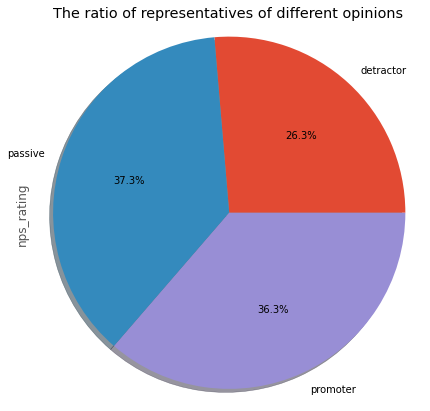

In [36]:
count['nps_rating'].plot(kind='pie', figsize=(7,7),
                  autopct='%1.1f%%',
                  shadow=True)
plt.title('The ratio of representatives of different opinions')
plt.axis('equal')
plt.show()

<BarContainer object of 3 artists>

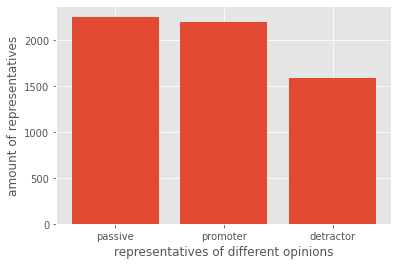

In [37]:
opinions = q4_nps['nps_group'].value_counts().head(7)
plt.xlabel('representatives of different opinions')
plt.ylabel('amount of representatives')
plt.bar(x=opinions.index, height=opinions.values)

In [40]:
from google.colab import files
q4_nps.to_csv('nikolaeva01-02.csv') 
files.download('nikolaeva01-02.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>